# Heart Disease Prediction

This data contains information on patients. We have to classify whether they have heart disease or not according to the features in it. For this example we are using the logistic regression example.

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#Reading from our file

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Details of variables:

This data contains 13 features and 1 target variable('target').

The information about features is given below:
There are 13 attributes

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina (1 = yes; 0 = no)
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
    condition: 0 = no disease, 1 = disease



## Target Variable:
target: have disease(1=yes, 0=no)

## Section 1: Exploratory Data Analysis

### Searching for outliers

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,1.123902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.960786,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,2.000000,1.000000


Here we can see that we have 303 records in total. The variables chol might have outlier. It could be a natural outlier. Let's check with a few plots.

<AxesSubplot:xlabel='chol'>

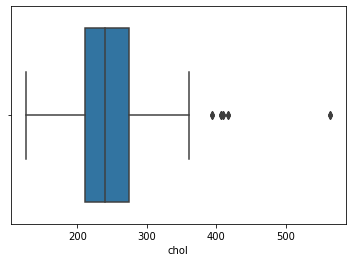

In [4]:
sns.boxplot(x = df['chol'])

As we can see from the boxplot above, one of the entries an extremely high cholesterol level, which can affect our analysis.

<AxesSubplot:xlabel='chol', ylabel='Count'>

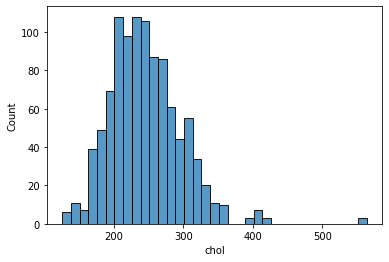

In [5]:
sns.histplot(x = df['chol'])

The histogram shows the same finding. 

As we know, outliers are proven to shift the mean and standard deviation in the data. This can affect the analysis and impact our model as well.

We need to either get rid of this record or fix the chol level to help our analysis better. I have decided not to get rid of the data. Even if I trim one outlier, new values can be considered as outliers. So to fix this, I'm going to replace outliers with the median value. From observing the above Histogram and Boxplot, I think 375 would be a good threshold value

In [6]:
median = df.loc[df['chol']<375, 'chol'].median()
median

239.0

<AxesSubplot:xlabel='chol'>

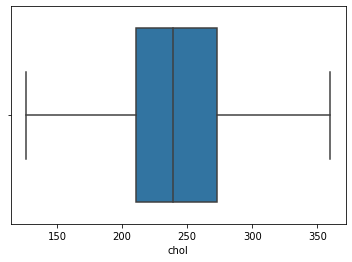

In [7]:
#Replacing the 
df['chol'] = np.where(df['chol']>375, median, df['chol'])

sns.boxplot(x=df['chol'])

As we can see from the above boxplot, we have successfully replaced the outlier values with median values.

In [8]:
#Checking for missing values
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

No column has any null values. Now let's study the features a bit.

I want to look closely at the age, sex, chestpain and the target variable and also get a quick glance at their relationships.

<AxesSubplot:xlabel='target', ylabel='count'>

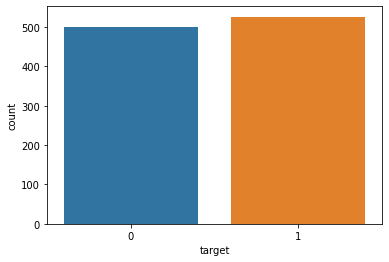

In [9]:
sns.countplot(data= df, x='target')

In [10]:
nodiseasecount = len(df[df['target'] == 0])
diseasecount = len(df[df['target'] == 1])
print("Percentage of people without disease: {:.2f}%".format(nodiseasecount/(len(df.target))*100))
print("Percentage of people with disease: {:.2f}%".format(diseasecount/(len(df.target))*100))

Percentage of people without disease: 48.68%
Percentage of people with disease: 51.32%


Text(0.5, 0, 'Sex(0=female, 1=male)')

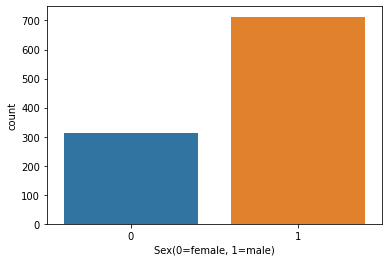

In [11]:
sns.countplot(x = 'sex', data = df)
plt.xlabel("Sex(0=female, 1=male)")

In [12]:
malecount = len(df[df['sex']==1])
femalecount = len(df[df['sex']==0])

print("Percentage of males: {:.2f}%".format((malecount/len(df.sex)*100)))
print("Percentage of females: {:.2f}%".format((femalecount/len(df.sex)*100)))

Percentage of males: 69.56%
Percentage of females: 30.44%


### No of people having disease divided by sex

In [13]:
df[df['target']==1].groupby('sex').count()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,226,226,226,226,226,226,226,226,226,226,226,226,226
1,300,300,300,300,300,300,300,300,300,300,300,300,300


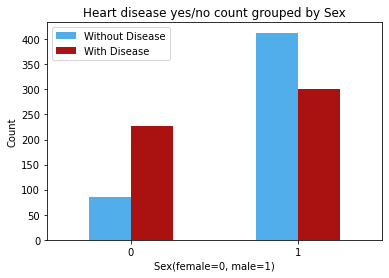

In [14]:
pd.crosstab(df.sex,df.target).plot(kind='bar', color = ['#52ADEB','#AA1111'])
# #1CA53B is RBG Hex Code for Blue and #AA1111 is RGB hex code for red.
plt.title('Heart disease yes/no count grouped by Sex')
plt.xticks(rotation=0)
plt.xlabel("Sex(female=0, male=1)")
plt.ylabel('Count')
plt.legend(['Without Disease', 'With Disease'])

### Chest Pain Analysis

<AxesSubplot:xlabel='cp', ylabel='Count'>

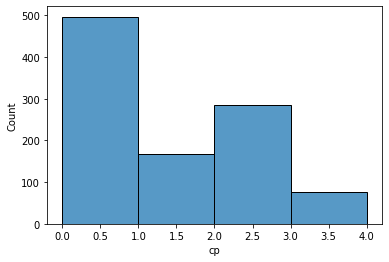

In [15]:
sns.histplot(x = df['cp'], bins=[0,1,2,3,4])

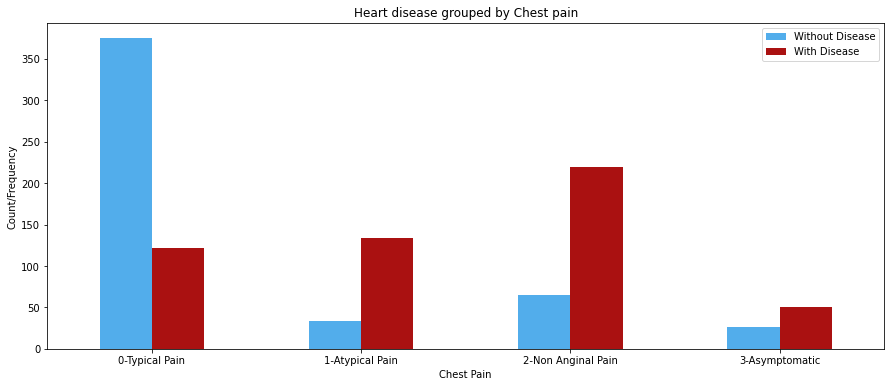

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(15,6), color = ['#52ADEB','#AA1111'])
plt.title("Heart disease grouped by Chest pain")
plt.xticks(ticks=[0,1,2,3], rotation=0, labels = ['0-Typical Pain','1-Atypical Pain', '2-Non Anginal Pain', '3-Asymptomatic'])
plt.xlabel("Chest Pain")
plt.ylabel('Count/Frequency')
plt.legend(['Without Disease','With Disease'])

### Checking heart disease freq by age

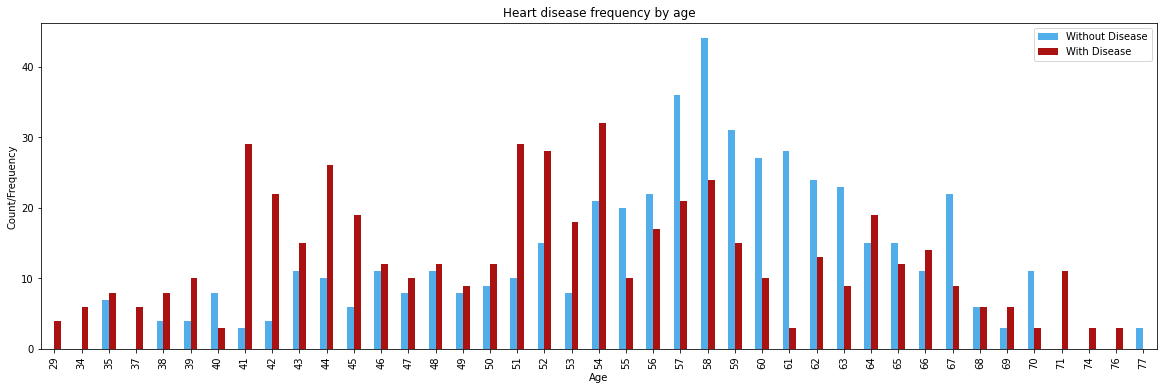

In [17]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize = (20,6),color=['#52ADEB','#AA1111'])
plt.title('Heart disease frequency by age')
plt.xlabel('Age')
plt.ylabel('Count/Frequency')
plt.legend(['Without Disease','With Disease'])

### Scatter plot of Maximum heart rate(thalach) vs Age

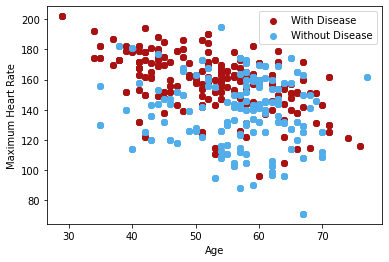

In [18]:
plt.scatter(x = df.age[df['target']==1], y =df.thalach[df['target']==1], c='#AA1111')
plt.scatter(x = df.age[df.target==0], y=df.thalach[df.target==0],c = '#52ADEB')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['With Disease','Without Disease'])

One clear trend which we can see is that as Age increases, maximum heart rate decreases

## Section 2: Data Transformation

In [19]:
y = df.target.values
x = df.drop(['target'],axis=1)

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

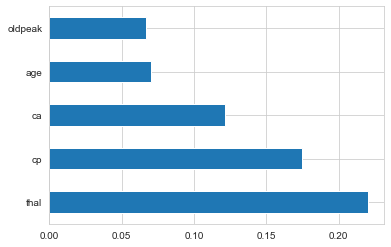

In [50]:
feat_imp = pd.Series(model.feature_importances_, index = x.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

### Splitting the data 80-20

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

### Scaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
# Creating a dictionary to keep track of test accuract scores
accuracy = {}

## Section 3: Creating Models

Firstly, let's divide our data into 2 parts, feature set and target(x and y)

In [25]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [26]:
x_train.shape

(820, 13)

In [27]:
x_test.shape

(205, 13)

In [28]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(x_train_scaled, y_train)
y_logReg = logReg.predict(x_test_scaled)
acc= logReg.score(x_test_scaled, y_test)*100

accuracy['Logistic Regression'] = acc
print("Test accuracy {:.2f}%".format(acc))

Test accuracy 87.80%


## K- Nearest Neighbor(KNN) Classification

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train_scaled, y_train)
y_knn = knn.predict(x_test_scaled)
acc = knn.score(x_test_scaled,y_test)*100

accuracy['KNN Classification'] = acc
print("2 Nearest Neighbor Score: {:.2f}%".format(acc))
accuracy

2 Nearest Neighbor Score: 99.02%


{'Logistic Regression': 87.8048780487805,
 'KNN Classification': 99.02439024390245}

## Support Vector Machine Classification(SVC)

In [30]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train_scaled, y_train)
y_svm = svm.predict(x_test_scaled)
acc = svm.score(x_test_scaled, y_test)*100

accuracy['Support Vector Classification'] = acc
print("Support Vector Classification Score: {:.2f}%".format(acc))
accuracy

Support Vector Classification Score: 91.22%


{'Logistic Regression': 87.8048780487805,
 'KNN Classification': 99.02439024390245,
 'Support Vector Classification': 91.21951219512195}

## Naive Bayes Classification

In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train_scaled, y_train)
y_nb = nb.predict(x_test_scaled)
acc = nb.score(x_test_scaled, y_test)*100

accuracy['Naive Bayes Classification'] = acc
print("Naive Bayes Classfication Score: {:.2f}%".format(acc))
accuracy

Naive Bayes Classfication Score: 87.80%


{'Logistic Regression': 87.8048780487805,
 'KNN Classification': 99.02439024390245,
 'Support Vector Classification': 91.21951219512195,
 'Naive Bayes Classification': 87.8048780487805}

## Decision Tree Classification

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)
y_dt = dt.predict(x_test_scaled)
acc = dt.score(x_test_scaled, y_test)*100

accuracy['Decision Tree Classification'] = acc
print("Decision Tree Classification Score: {:.2f}%".format(acc))
accuracy

Decision Tree Classification Score: 100.00%


{'Logistic Regression': 87.8048780487805,
 'KNN Classification': 99.02439024390245,
 'Support Vector Classification': 91.21951219512195,
 'Naive Bayes Classification': 87.8048780487805,
 'Decision Tree Classification': 100.0}

## Random Forest Classification

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state=1)
rf.fit(x_train_scaled, y_train)
y_rf = rf.predict(x_test_scaled)
acc = rf.score(x_test_scaled, y_test)*100

accuracy['Random Forest Classification'] = acc
print("Random Forest Classification Score: {:.2f}%".format(acc))
accuracy

Random Forest Classification Score: 100.00%


{'Logistic Regression': 87.8048780487805,
 'KNN Classification': 99.02439024390245,
 'Support Vector Classification': 91.21951219512195,
 'Naive Bayes Classification': 87.8048780487805,
 'Decision Tree Classification': 100.0,
 'Random Forest Classification': 100.0}

## Section 4: Scoring and Accuracy

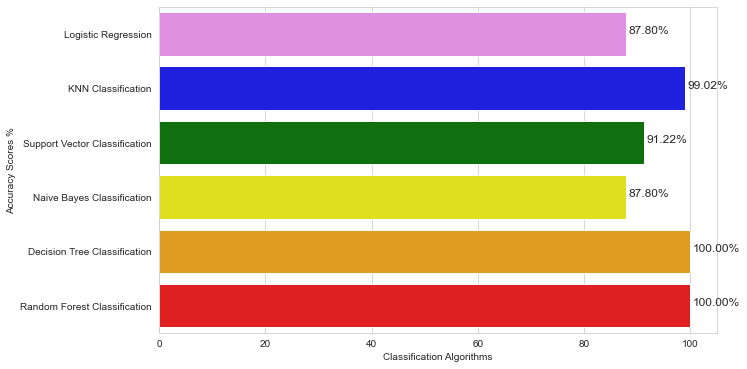

In [34]:
colors = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']

sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
plt.yticks(np.arange(0,100,10))
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores %')
sns.barplot(x = list(accuracy.values()), 
            y = list(accuracy.keys()), 
            palette = colors,
            orient = 'h')

for index,data in enumerate(list(accuracy.values())):
    plt.text(x= data+0.5 , y =index , s=f"{data:.2f}%" , fontdict=dict(fontsize=12))
plt.show()

As seen above, Random Forest Classification and Decision Tree Classification both have 100% accuracy followed by KNN Classification which has 99.02% accuracy

### Storing Predictions

In [35]:
from sklearn.metrics import confusion_matrix

cm_logReg = confusion_matrix(y_test, y_logReg)
cm_knn = confusion_matrix(y_test, y_knn)
cm_svm = confusion_matrix(y_test, y_svm)
cm_nb = confusion_matrix(y_test, y_nb)
cm_dt = confusion_matrix(y_test, y_dt)
cm_rf = confusion_matrix(y_test, y_rf)

<AxesSubplot:title={'center':'Random Forest Confusion Matrix'}>

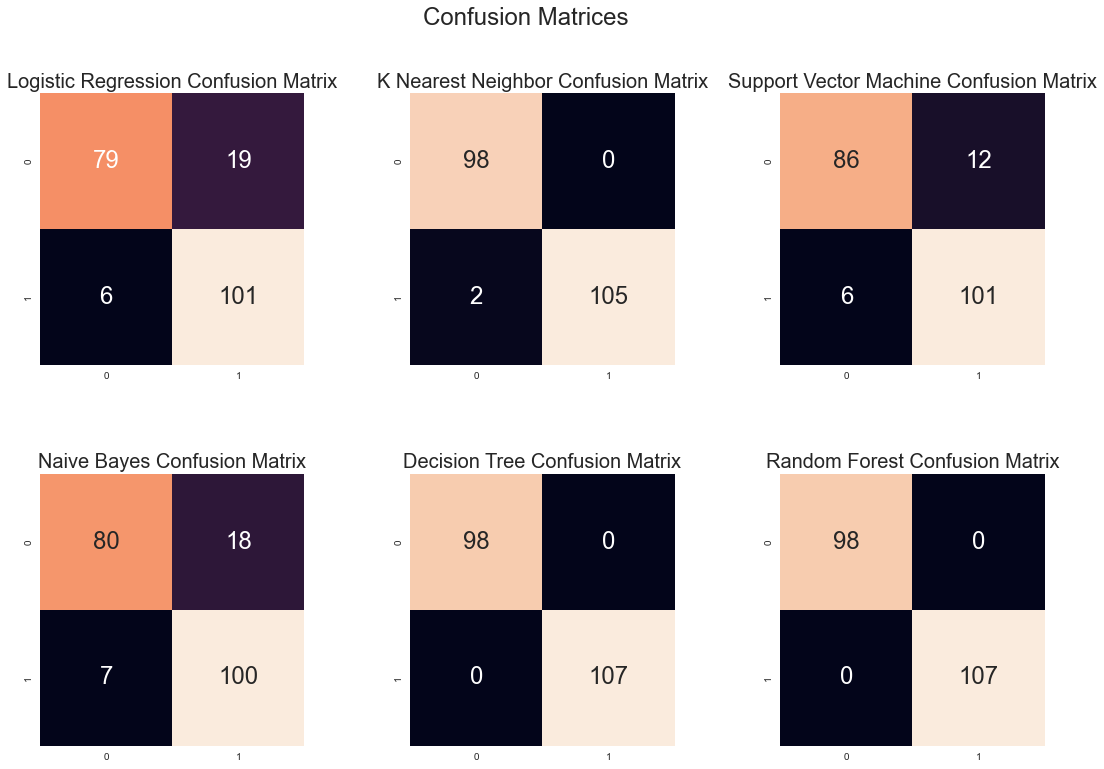

In [36]:
plt.figure(figsize=(18,12))
font = {'size': 20}
plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace=0.4)


plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix", fontdict = font)
sns.heatmap(cm_logReg, annot = True, fmt='d', cbar=False, annot_kws = {'size':24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbor Confusion Matrix", fontdict = font)
sns.heatmap(cm_knn, annot = True, fmt='d', cbar=False, annot_kws = {'size':24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix", fontdict = font)
sns.heatmap(cm_svm, annot = True, fmt='d', cbar=False, annot_kws = {'size':24})

plt.subplot(2,3,4)
plt.title(label= "Naive Bayes Confusion Matrix", fontdict = font)
sns.heatmap(cm_nb, annot = True, fmt='d', cbar=False, annot_kws = {'size':24})

plt.subplot(2,3,5)
plt.title("Decision Tree Confusion Matrix", fontdict = font)
sns.heatmap(cm_dt, annot = True, fmt='d', cbar=False, annot_kws = {'size':24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix", fontdict = font)
sns.heatmap(cm_rf, annot = True, fmt='d', cbar=False, annot_kws = {'size':24})

As decision tree models are prone to overfitting at times, I will go ahead with Random Forest Classification model.

In [37]:
#Saving the model and the scaler

from pickle import dump

dump(rf,open('RandomForestClassifier.pkl','wb'))
dump(scaler, open('minmaxscaler.pkl','wb'))

In [44]:
clm_imp = pd.DataFrame({'column':x.columns, 'importance':rf.feature_importances_
}, columns = ['column','importance'])

clm_imp

,column,importance
0,age,0.090853
1,sex,0.034942
2,cp,0.136462
3,trestbps,0.070741
4,chol,0.086752
5,fbs,0.009150
6,restecg,0.018946
7,thalach,0.112776
8,exang,0.054003
9,oldpeak,0.106988


Text(0.5, 1.0, 'Feature importances acc to Random Forest')

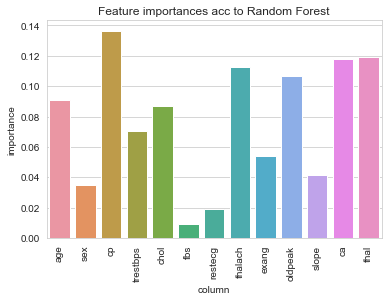

In [48]:
sns.barplot(x = clm_imp.column, y = clm_imp.importance)
plt.xticks(rotation=90)
plt.title('Feature importances acc to Random Forest')